<a href="https://colab.research.google.com/github/teznatech/IoT-Bootcamp/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Getting Started



> This course will provide an depth look into IoT and developing said technologies. Students will be capable of using single board computers like the Raspberry Pi, Intel Galileo, and others to gather, store, and send data. Using familiar protocols, users will be able to access the data on the remote device. All source code is available on [Github](https://github.com/teznatech/IoT-Bootcamp).

**KEYWORDS**: IoT, GPIO, REST API, Client-Server, HTTP, MQTT, WebSockets, Linux, Python, SQL, Cron, Edge Computing



We will be building a simple, yet powerful, surveillance system using the following materials:


**HARDWARE MATERIALS**


*   Raspberry Pi Zero W
*   16GB Micro SD
*   Pi Camera Module
*   Pan/Tilt camera base
*   DHT22 Humidity and Temperature Sensor
*   10 K Ohm Resistor
*   Breadboard (recommended)
*   5V 2.5A Power Supply (recommended)
*   Various female-female and female-male jumper cables (recommended)
*   3.3V - 5V Logic Level Converter (optional)
*   Raspberry Pi Zero camera case (optional)

**SOFTWARE REQUIREMENTS**

*   Linux OS (Raspbian, Ubuntu, etc.)
*   Python 3 (Flask)
*   SQLite
*   ngrok and remot3.it

In [0]:
# Setting up Notebook with python packages
!pip install requests
# Required to display image and JSON object inline
from IPython.display import Image, JSON
# Required for sending GET and POST requests
import requests
# JSON package
import json

# II. OS Installation

* We will be setting up our Raspberry Pi with the latest distribution of [Raspbian lite](https://www.raspberrypi.org/downloads/raspbian/).

*   Unzip the file and flash it to your MicroSD Card using balenaEtcher or another similiar program (Card name should be `Boot`).
*   Navigate to **`/Volumes/Boot`** and create a new file to store Wifi network information - **`$ touch wpa_supplicant.conf`**
*   Copy the following code to **`wpa_supplicant.conf`**

```
country=CO
ctrl_interface=DIR=/var/run/wpa_supplicant GROUP=netdev
update_config=1
network={
	ssid="MY-WIFI-NETWORK"
	psk="MY-WIFI-PASSWORD"
	key_mgmt=WPA-PSK
}
network={
	ssid="MY-OTHER-NETWORK"
	psk="MY-OTHER-PASSWORD"
	key_mgmt=WPA-PSK
} 
```


*   SSH is disabled be default on Raspbian so lets create a file to enable the service - **`$ touch ssh`**

*   Once Raspberry is running and connnected to a network, use **`nmap`**, **`LanScan`**, or a similar tool to expose the Raspberry's IP address.

**NOTE**
> If you include more than one network block, **`wpa_supplicant`** will select the network that it rates as the best choice based off:
1.   Order of network blocks in the wpa_supplicant.conf file
2.   Security level (WPA2 is preferred)
3.   Signal strength

# III. Hardware Setup



Mostly all IoT systems will have a combination of sensors and actuators. Sensors are used to collect data while actuators are used to transform some form of energy into motion. Depending on the use cases of your system, data from sensors can be used to activate actuators automatically. Lets take a better look at various types of sensors:


*   **Passive Sensor** : Does not require an additional external power source for monitoring event environments
*   **Active Sensor** : Requires an additional external power source for usage
*   **Base Sensor** : Those that have a physical sensor without the addition of embedded processors for signal processing, but only for forwarding of the measured value. Some of the base sensors are Accelerometer, Gyroscope, Magnetometer, Proximity, Heartrate, etc.
*   **Smart Sensor** : Are those that incorporate some of the digital motion processors (DMPs). This means that this class of sensors takes the input signal as the value of the state of an event or the value of a physical process and then uses embedded computing, performs a certain calculation, processing and processing before the signal is transmitted to the network layer of the IoT ecosystem.
*   **Intelligent Sensor** : As perhaps their name implies, this type of sensor is equipped with components so it can overwhelm a number of intelligent modalities such as self-validation, automated adaptation, and self-identification and also a plethora of self-testing functions. One of the basic differences with regard to smart sensors is that intelligent sensors can respond to certain activities after the detected changes.

Actuators can be categorized based on energy sources:

*    **Pneumatic** : Use compressed air for generating motion.
*    **Hydraulic** : Use the liquid for generating motion.
*    **Thermal** : Use a heat source for generating motion.
*    **Electric** : Use external energy sources such as batteries or other types of electric energy to generate motion.

For our project we will use the following sensors and actuators:

*   **Pi Camera** : This is a passive, smart sensor.
*   **DHT22 Humidity and Temperature Sensor** : This is a passive, smart sensor.
*   **Pan/Tilt camera base** : This is composed of two servo motors. It is an electrically powered actuator.


**a) Board Overview**

Being a single board computer, the Raspberry Pi Zero W (shown below) has all of its components integrated under one motherboard.

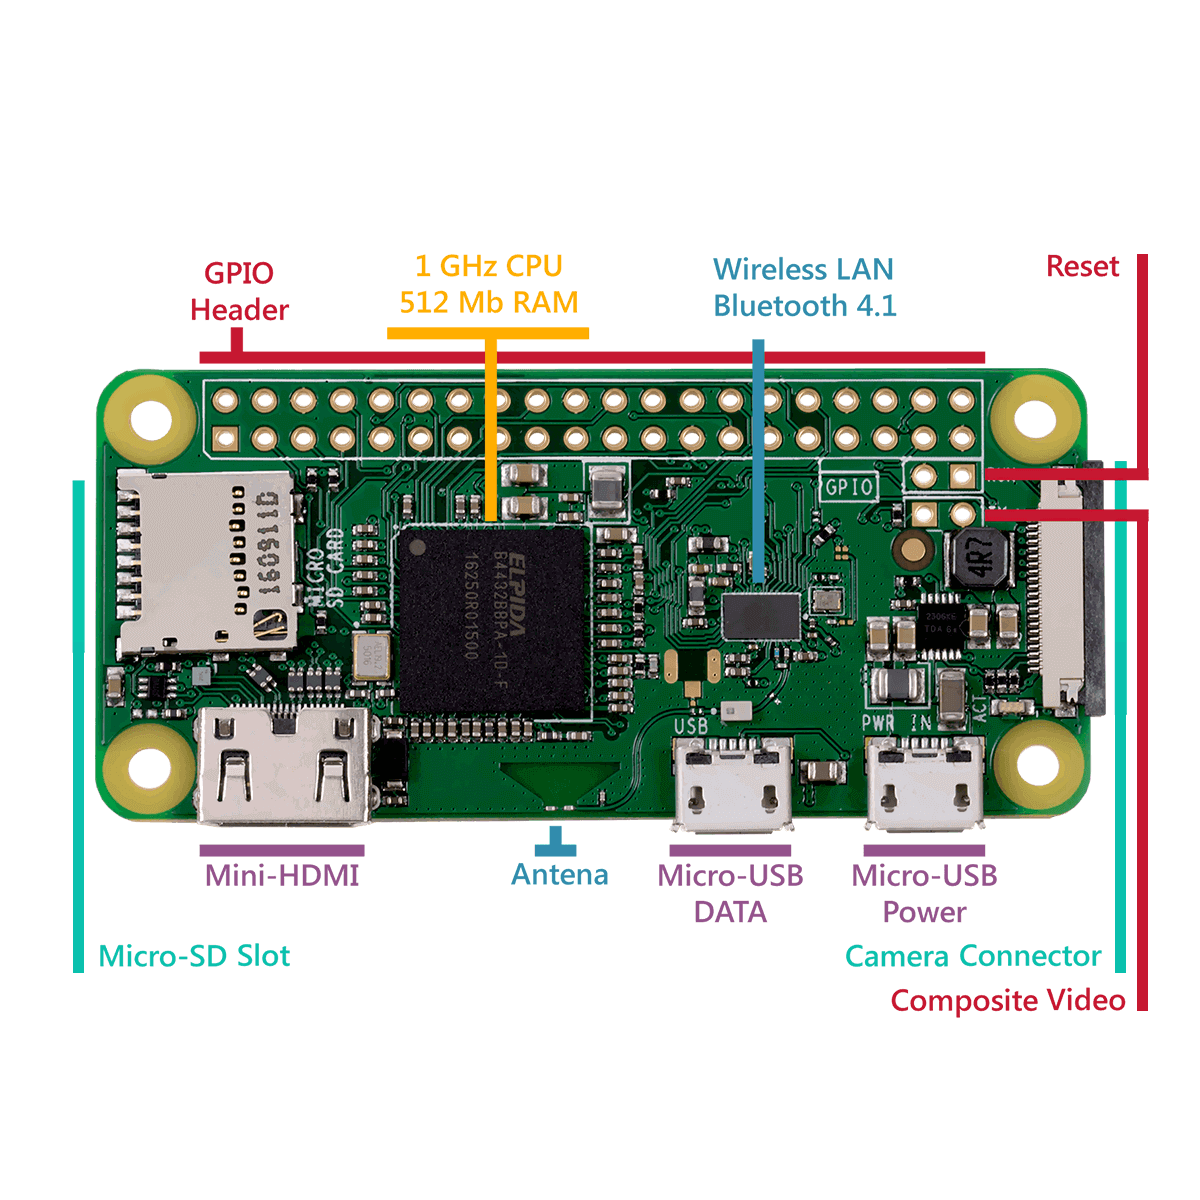

In [0]:
Image('https://market.samm.com/raspberry-pi-zero-w-en-raspberry-pi-models-raspberry-pi-103-27-B.png',
      height=500, width=500)

In addition to the familiar USB, Ethernet and HDMI ports, the Raspberry Pi offers the ability to connect directly to a variety of electronic devices. These include:

*   Digital outputs: turn lights, motors, or other devices on or off
*   Digital inputs: read an on or off state from a button, switch, or other sensor
*   Communication with chips or modules using low-level protocols: SPI, I2C, or serial UART

Connections are made using GPIO ("General Purpose Input/Output") pins. Unlike USB, etc., these interfaces are not "plug and play" and require care to avoid miswiring. The Raspberry Pi GPIOs use 3.3V logic levels, and can be damaged if connected directly to 5V levels without level-conversion circuitry. For this we recommend using the SparkFun bidirecctional level converter (shown below).

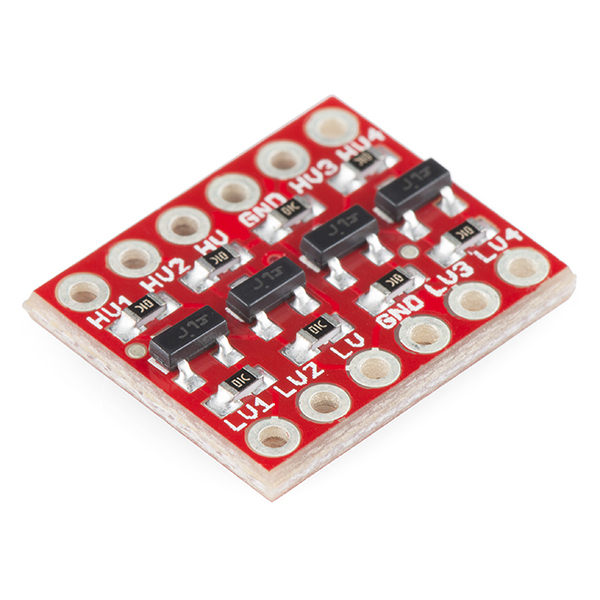

In [0]:
Image('https://cdn.sparkfun.com//assets/parts/8/5/2/2/12009-06.jpg',
      height=250, width=250)

**b) GPIO Pins**

The GPIO Pins are mapped to a set configuration. It is important to design properly the circuit before connecting any devices to the motherboard. For example, some sensors or actuators require PWM (Pulse-Width Modulation), TX/RX functionality, I2C interfacing, etc.

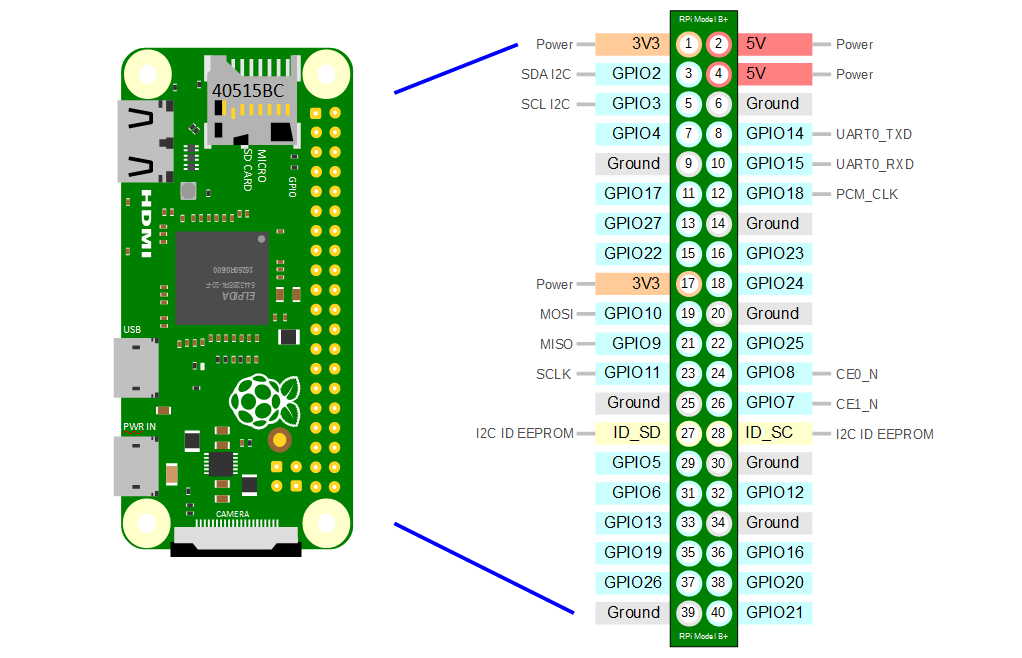

In [0]:
Image('https://leanpub.com/site_images/jerpi/rpiZ-08.png',
       height=400, width=600)

For this project, we will use a breadboard to prototype our circuit. The DHT22 sensor and each of the servo motors on the pan/tilt base have 3 outputs: power, ground, and data. The power for the DHT22 sensor can be drawn from the Raspberry's 3.3V pin (physical pin 1) while the power for the servo motors should be 5V (physical pins 2 & 4). We can use any of the Raspberry's ground pins for all three of the ground ports of our peripherals. Next we need to supply the proper data channels to our sensor and motors. Data will be collected from the sensor to GPIO4 and data will be pushed to the servos from pins GPIO23 for the tilt servo and GPIO24 for the pan servo. For best practices always calculate the amount of resistance needed in the circuit. In this case, we should place a 10k Ohm resistor in between the DHT22 sensor's power and data cables. Reference the image below.

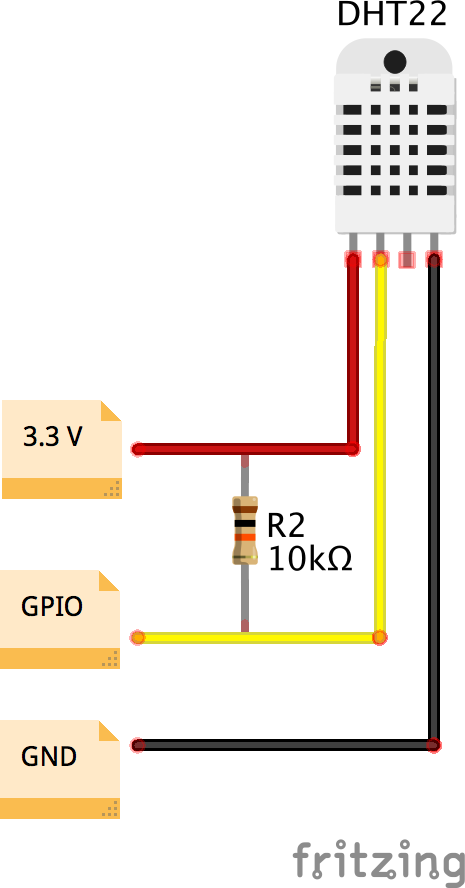

In [0]:
Image('https://hackster.imgix.net/uploads/attachments/235099/ufHQOTHbuNaJDnZo6pmV.png',
     width=300, height=500)

**c) Camera Module**

Lastly, lets connect our Pi Camera to the CSI (Camera Serial Interface) port on the Raspberry. Simply unlatch the the locking mechanism on both the Pi Camera's port and the Raspberry's CSI port, then slide in the 15 pin ribbon cable into each port. Finally, close the latches on the ports to secure the ribbon cable.

# IV. Software Requirements



> Although other tools can be used to achieve the same results, this project uses a lightweight combination of software and services design to work on a large variety of single board computers or microprocessors.



**a) Connecting to Raspberry**

Using a computer connected to the same network as the Raspberry, use SSH to establish a connection.


```
$ ssh pi@<IP_ADDRESS>
OR 
$ ssh pi@<HOSTNAME>
```

When prompted for the password, enter **`raspberry`** if it is your first time connecting.

**b) Installing Proxies**

Once we are successfully logged into the Raspberry as the pi user, lets begin by installing two very useful communication tools: **`remot3.it`** and **`ngrok`**.

`Remot3.it` and `ngrok` provide reverse proxies that allow for remote connections without the need of port forwarding.

`remot3.it install`
```
$ sudo apt-get update
$ sudo apt-get install connectd
```

`ngrok install`
```
$ wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-arm.zip
$ unzip /path/to/ngrok.zip
$ rm /path/to/ngrok.zip
$ ./ngrok authtoken <YOUR_AUTH_TOKEN>
```

**NOTE**


> **`Remot3.it`** and **`ngrok`** are FREE services that require users to make and register an account.



**c) Installing Python**

Most distributions of Linux come preinstalled with Python. To check what version is currently installed on your Raspberry, use **`$ python --version`**.

Since Raspbian Lite does not have python3 included, run the following command.
```
$ sudo apt-get install python3
```

Make sure pip3 is available. 
```
$ sudo apt install python3-pip
```

Pip3 can now be used to install and uninstall python packages directly to a python3 environment.
```
$ pip3 install <PACKAGE_NAME>
$ pip3 uninstall <PACKAGE_NAME>
```

**OPTIONAL**


> You may install **`virtualenv`** to create seperate environments for your python dependencies. Use the commands below to install, create, activate, and deactivate virtual environments.

```
$ pip3 install virtualenv
$ python3 -m venv <ENV_NAME>
$ source <ENV_NAME>/bin/activate
$ deactivate
```

**d) Installing Dependencies**

These dependencies provide some of the functionalities necessary to make powerful and truly wireless systems. **`Flask`** and it's plugins can be used to build servers that communicate using either HTTP, MQTT, or WebSockets among others.

For this project we will be setting up a HTTP server that hosts a REST API, to collect data from the Pi, on a Client-Server architecture.

First, lets begin by downloading the source code from Github.

```
$ sudo apt install git
$ git clone https://github.com/ctezna/iot-tutorial.git
```





If you are using a virtual environment, always activate venv prior to installing packages. Once `pip3` is functioning, find the [requirements.txt](https://github.com/ctezna/IoT-Tutorial/blob/master/app/requirements.txt) file and execute the following commands to install all the dependencies.


```
$ sudo pip3 install --default-timeout=100 -r requirements.txt
$ sudo pip3 uninstall numpy
$ sudo apt install python3-numpy
```







Some of the dependencies included are:


*   `Flask` : Micro framework for web development written in Python
*   `SQLAlchemy` : ORM pluggin used to write database schemes
*   `picamera` : Python interface for manipulating Rasbperry Pi camera modules
*   `RPi.GPIO` : Popular library for interacting with the computer's general purpose input/output pins
*   `python-crontab` : Python package that allows users to write, enable, and disable background jobs on the Cron service




**NOTE**


> Use `sudo` permissions with caution, `sudo` permissions are recommended when installing packages on single board Linux computers. To check which dependencies you have installed under your environment run:


```
$ sudo pip3 freeze
```


**e) Enabling Camera Interface**

Before we are able to start up our server, the camera interface should be enabled in the Raspberry configurations. To access the configurations run the following command.


```
$ sudo raspi-config
```

Using the graphical interface, select Camera and continue to enable the interface. Once completed exit back to the terminal and reboot.

```
$ sudo reboot
```

**NOTE**

> If you encounter any issues during any of the steps in the Software Requirements section, make sure your OS is up to date.



```
$ sudo apt-get update
$ sudo apt-get upgrade
```



# V. Building the Backend

> Now that we have all the connections and packages required to build our application logic, we are going to use the `Flask` micro framework to construct a web server. `Flask` is highly unopinionated, allowing us apply the architecture that best fits the use cases. Using a micro framework also provides an optimization in the amount of source code and ultimately the final size of the application, this is very important when working with limited resources.

**a) Designing the Project Structure**

Our project is intended to work with a sensor that is collecting enviornment data and a camera module that we can control using a pan/tilt base. Here we can identify two seperate modules: our sensor data module, and our camera module. We can design our application in components using `Flask blueprints`. With the `blueprint` object is essentially a miniature application or microservice embeded within the larger application. `Flask` allows us to build truly elastic apps.

Before going in depth into the actual development, lets run a quick `$ tree` command at the root of the project repository.